In [ ]:
# read in a VR halo
# find the highest Mvir
# find its subhalos using Rvir
# find its galaaxies using the VR id


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
import h5py
import fitsio

In [24]:
h = 0.6732

In [3]:
# find the most massive halo in the box
halo_fname = '/cosma8/data/do012/dc-wu5/cylinder/output_HYDRO_PLANCK/host_halos_0071.fit'
data_h, header = fitsio.read(halo_fname, header=True)
#print(header)
Mvir = data_h['Mvir']
arg = np.argmax(Mvir)
Mvir = Mvir[arg]
Rvir = data_h['Rvir'][arg]
print('%e'%Mvir, Rvir)
x_cen = data_h['px'][arg]
y_cen = data_h['py'][arg]
z_cen = data_h['pz'][arg]
hostid_cen = data_h['haloid'][arg]
print('haloid', hostid_cen)

1.467059e+15 2.5092478
haloid 12266554


1.467059e+15 2.5092478


In [26]:
### Get the original VR subhalos# 
#### location on cosma
sim_name = 'HYDRO_PLANCK'
loc = f'/cosma8/data/dp004/flamingo/Runs/L1000N1800/{sim_name}/'
fname = loc + f'SOAP/halo_properties_0071.hdf5'
f = h5py.File(fname,'r')
print(f.keys())

<KeysViewHDF5 ['BoundSubhaloProperties', 'ExclusiveSphere', 'FOFSubhaloProperties', 'InclusiveSphere', 'Parameters', 'ProjectedAperture', 'RecentlyHeatedGasFilter', 'SO', 'SOAP', 'SWIFT', 'SearchRadius', 'VR']>


In [17]:
print(f['VR'].keys())

<KeysViewHDF5 ['CentreOfPotential', 'HostHaloID', 'ID', 'Index', 'NumberOfSubstructures', 'ParentHaloID', 'StructureType']>


In [48]:
id_vr = f['VR/ID']
hostid_vr = f['VR/HostHaloID'] # like "top parent"  # parentid is "direct parent"
pos = f['VR/CentreOfPotential']
x = pos[:,0] * h # Mpc/h
y = pos[:,1] * h
z = pos[:,2] * h

In [49]:
sel = (hostid_vr == hostid_cen)
print(len(id_vr[sel]))
x_sub = x[sel]
y_sub = y[sel]
z_sub = z[sel]

310


In [54]:
# Find Rvir subhalos
from scipy import spatial
gal_position = np.dstack([x, y, z])[0]
gal_tree = spatial.cKDTree(gal_position)
indx = gal_tree.query_ball_point([x_cen, y_cen, z_cen], Rvir)

In [55]:
# dist = (x - x_cen)**2 + (y - y_cen)**2 + (z - z_cen)**2
# dist = np.sqrt(dist)
# sel_Rvir = dist < Rvir
x_sub_Rvir = x[indx]
y_sub_Rvir = y[indx]
z_sub_Rvir = z[indx]

(648.6599576934975, 657.0)

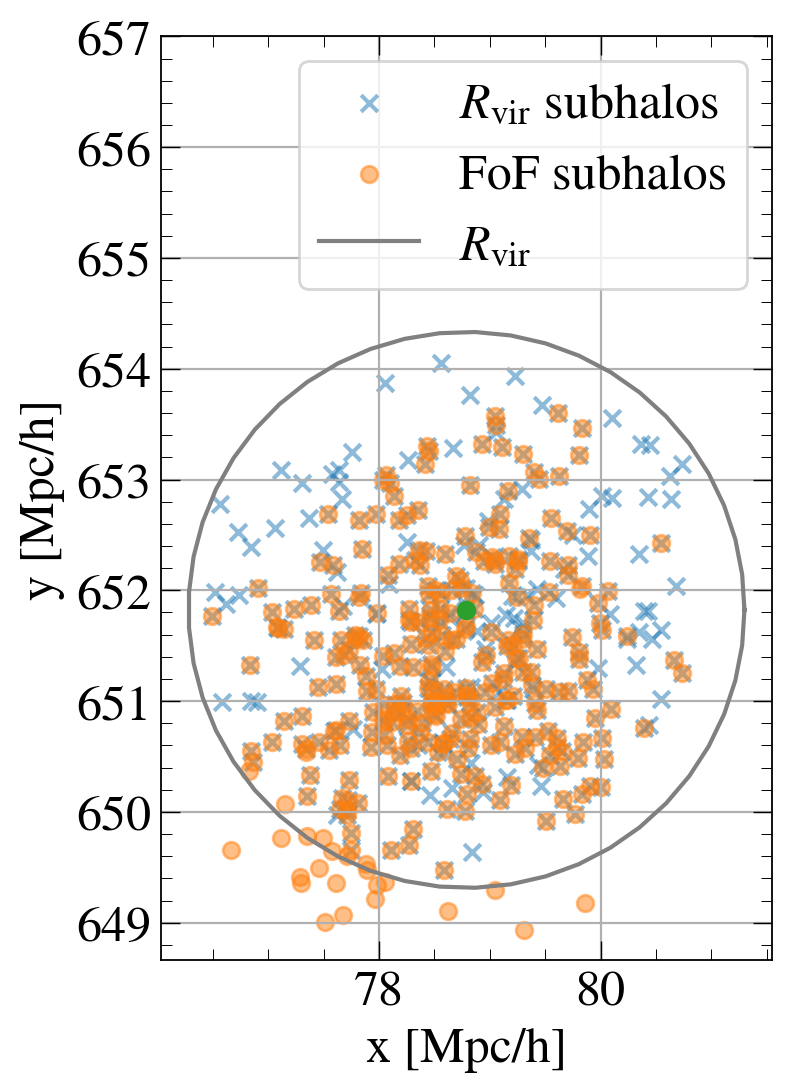

In [60]:

plt.scatter(x_sub_Rvir, y_sub_Rvir, alpha=0.5, marker='x', label=r'$R_{\rm vir}$'+' subhalos')

plt.scatter(x_sub, y_sub, alpha=0.5, label='FoF subhalos')

plt.scatter(x_cen, y_cen)

t = np.linspace(0,2*np.pi)
plt.plot(x_cen+Rvir*np.cos(t), y_cen+Rvir*np.sin(t), c='gray', label=r'$R_{\rm vir}$')
ax = plt.gca()
ax.set_aspect('equal')
plt.legend()
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')
plt.ylim(None, 657)

In [2]:
### plot HOD with FOF membership (instead of Mvir)
### UNFINISHED!  TAKING TOO LONG.

# sim_name = 'HYDRO_PLANCK'
# loc = f'/cosma8/data/dp004/flamingo/Runs/L1000N1800/{sim_name}/'
# fname = loc + f'SOAP/halo_properties_0071.hdf5'
# f = h5py.File(fname,'r')
# hostid_vr = f['VR/HostHaloID'] # like "top parent"  # parentid is "direct parent"

# halo_fname = '/cosma8/data/do012/dc-wu5/cylinder/output_HYDRO_PLANCK/host_halos_0071.fit'
# data_h, header = fitsio.read(halo_fname, header=True)
# haloid_cen = data_h['haloid']
# Mvir = data_h['Mvir']
# sel = Mvir > 1e14
# Mvir = Mvir[sel]

# Ngal_fof = []
# nhalo = len(Mvir)
# print(nhalo)
# for i_halo in range(nhalo):
#     sel = (hostid_vr == haloid_cen[i_halo])
#     Ngal_fof.append(len(hostid_vr[sel]))


4917


KeyboardInterrupt: 

In [ ]:
plt.scatter(Mvir, Ngal_fof) 